**Overview of Lead Scoring Case Study Analysis**

 - Inspecting DataFrame
 - Exploratory Data Analysis
  - Handling Missing Values
    - Drop columns which high missing values. ( Selected > 40 % )
    - Check the distribution of different levels in categorical variables
    - Impute or handle the missing values
  - Duplicate/Unique Value Check
  - Univariate Analysis-Categorical Variables
  - Univariate Analysis-Continous Variables
  - Bivariate Analysis-Categorical Columns
  - Bivariate Analysis-Continous-Continous Variable
  - 'Select'/ 'Default' Treatment
  - Outlier Treatment
 - Data Preparation
  - Dummy Variable Creation
  - Train-Test Split
  - Feature Scaling
  - Checking Correlation among Variables
 - Model Building
  - Running First Training Model
  - Feature selection using RFE
  - Analyzing Using Statsmodel
  - Plotting ROC Curve
  - Finding optimal cut-off point
  - Confusion Matrix
  - Precision and Recall
 - Making predictions on the Test set
  - Lead Score Generation


In [ ]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')


#Importing the necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 300

#Test - Train split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler

#Model building
import statsmodels.api as sm

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

### Inspecting DataFrame

Note: Please change directory address based on your system.

In [ ]:
#Reading the Leads Data
lead_df=pd.read_csv(r'C:\Users\Machine Learning\Logistic Regression\Lead Scoring\Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
#Check shape of dataset
print(lead_df.shape)

(9240, 37)


In [ ]:
# Check the column-wise info of the dataframe
print(lead_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [ ]:
#Further insights on the dataframe to understand how the data is spread 
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Exploratory Data Analysis

#### Handling Missing Values

In [ ]:
# Checking the percentage of null values in the dataframe 'Lead_Score_init_df' column-wise
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

<Figure size 7200x7200 with 0 Axes>

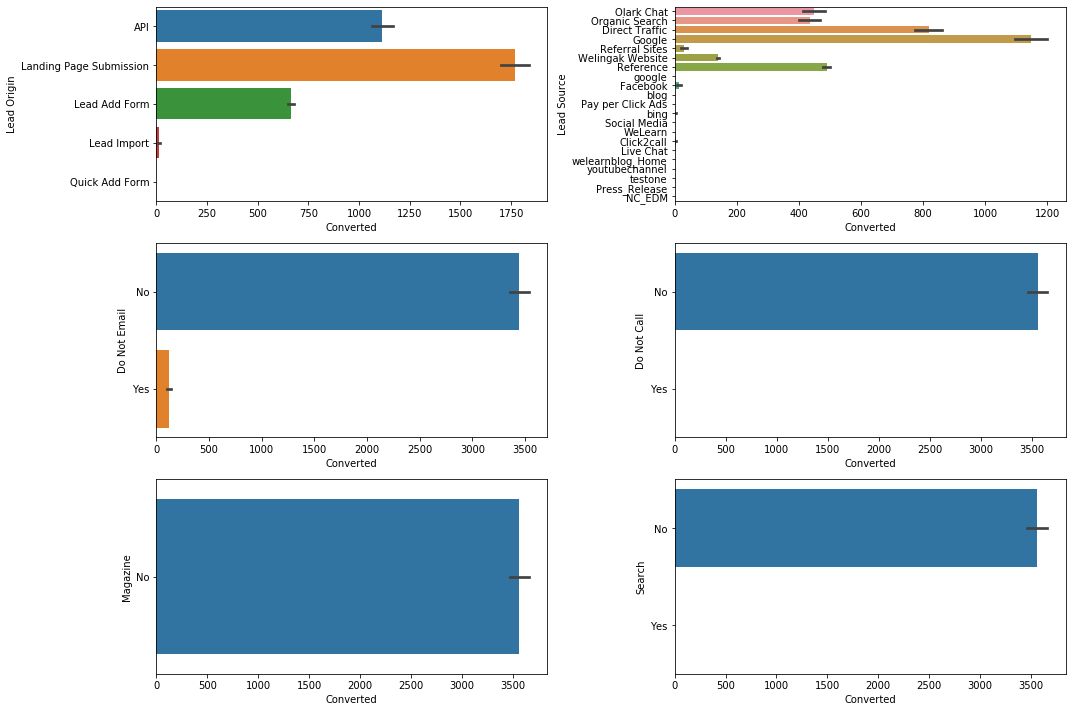

In [ ]:
#Plotting a barplots for Converted=1 for different variables

plt.figure(figsize=(100,100))
f,axes=plt.subplots(3,2,figsize=(15,10))

sns.barplot(x=lead_df['Converted'],y=lead_df['Lead Origin'],estimator=sum,ax=axes[0,0])
sns.barplot(x=lead_df['Converted'],y=lead_df['Lead Source'],estimator=sum,ax=axes[0,1])
sns.barplot(x=lead_df['Converted'],y=lead_df['Do Not Email'],estimator=sum,ax=axes[1,0])
sns.barplot(x=lead_df['Converted'],y=lead_df['Do Not Call'],estimator=sum,ax=axes[1,1])
sns.barplot(x=lead_df['Converted'],y=lead_df['Magazine'],estimator=sum,ax=axes[2,0])
sns.barplot(x=lead_df['Converted'],y=lead_df['Search'],estimator=sum,ax=axes[2,1])
plt.tight_layout()

<Figure size 7200x7200 with 0 Axes>

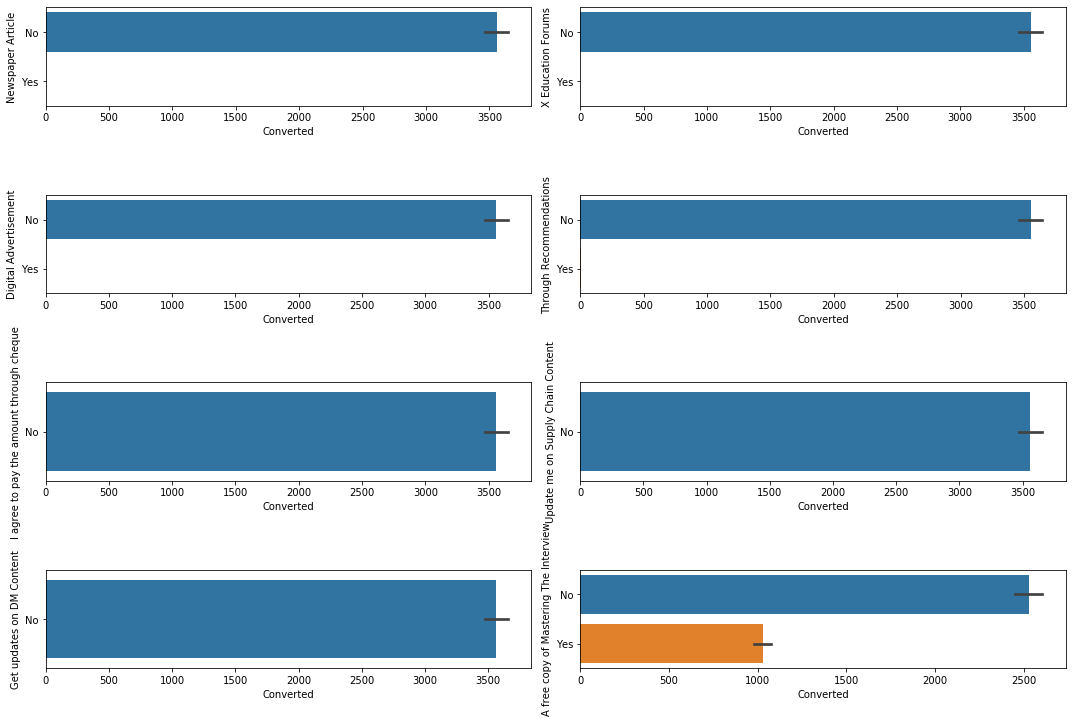

In [ ]:
#Plotting a barplots for Converted=1 for different variables
plt.figure(figsize=(100,100))
f,axes=plt.subplots(4,2,figsize=(15,10))

sns.barplot(x=lead_df['Converted'],y=lead_df['Newspaper Article'],estimator=sum,ax=axes[0,0])
sns.barplot(x=lead_df['Converted'],y=lead_df['X Education Forums'],estimator=sum,ax=axes[0,1])
sns.barplot(x=lead_df['Converted'],y=lead_df['Digital Advertisement'],estimator=sum,ax=axes[1,0])
sns.barplot(x=lead_df['Converted'],y=lead_df['Through Recommendations'],estimator=sum,ax=axes[1,1])
sns.barplot(x=lead_df['Converted'],y=lead_df['I agree to pay the amount through cheque'],estimator=sum,ax=axes[2,0])
sns.barplot(x=lead_df['Converted'],y=lead_df['Update me on Supply Chain Content'],estimator=sum,ax=axes[2,1])
sns.barplot(x=lead_df['Converted'],y=lead_df['Get updates on DM Content'],estimator=sum,ax=axes[3,0])
sns.barplot(x=lead_df['Converted'],y=lead_df['A free copy of Mastering The Interview'],estimator=sum,ax=axes[3,1])

plt.tight_layout()

**Observations:**

*1. There are certain columns(like Magazine,Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content ,I agree to pay the amount through cheque)  that have only one value - 'No' are not considered in further analysis as they will not help in classification**

*2. There are a few categorical variables, namely,  Do Not Email,Do Not Call, What matters most to you in choosing a course, Search, Newspaper Article, X Education Forums,Newspaper,Digital Advertisement and Through Recommendations that have one level dominatig the others. Hence the proportions of these levels should be determined and should be removed if not found necessary.**

*3. There are categorical variables like 'Specialization', 'How did you hear about X Education', etc that has values'Select'. These columns must have been given as options to users and responses of users who didn't choose any option are marked as 'Select'. These are same as Not available and hence they are replaced with nan**



##### Drop columns which high missing values. ( Selected > 40 % )

In [ ]:
# Dropping the columns that are not required for the intended study/analysis and 
# also the columns which are having high % of missing values(> 40%)

lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index',
                        'Asymmetrique Profile Score','Get updates on DM Content','I agree to pay the amount through cheque',
                        'X Education Forums','Receive More Updates About Our Courses','Do Not Call','Search','Newspaper Article',
                        'Newspaper', 'Magazine','Digital Advertisement','Through Recommendations', 'Lead Number',
                        'A free copy of Mastering The Interview','Update me on Supply Chain Content', 'Do Not Email',
                        'Prospect ID', 'Lead Quality'],axis=1,inplace=True)

In [ ]:
#Checking the % of missing values for existing columns
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                             15.37
Last Notable Activity                             0.00
dtype: float64

##### Check the distribution of different levels in categorical variables

In [ ]:
# Check the distribution of different levels in categorical variables

# Checking the values for the column 'Tags'
print(lead_df['Tags'].value_counts()) 

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [ ]:
# Dropping the column 'Tags' as it have values which are updated after lead has been contacted.
lead_df.drop(['Tags'],axis=1,inplace=True)

In [ ]:
# Checking the values for the column 'What is your current occupation'
print(lead_df['What is your current occupation'].value_counts()) 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [ ]:
# Checking the values for the column 'How did you hear about X Education'
print(lead_df['How did you hear about X Education'].value_counts()) 

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


In [ ]:
# Checking the values for the column 'Specialization'
print(lead_df['Specialization'].value_counts()) 

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [ ]:
# Checking the values for the column 'Last Activity'
print(lead_df['Last Activity'].value_counts()) 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


In [ ]:
# Checking the values for the column 'Last Notable Activity'
print(lead_df['Last Notable Activity'].value_counts())

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64


In [ ]:
# Checking the values for the column 'Country'
print(lead_df['Country'].value_counts())

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
South Africa               4
Sweden                     3
Ghana                      2
Italy                      2
China                      2
Belgium                    2
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Philippines                2
Bangladesh                 2
Liberia                    1
Indonesia                  1
Denmark                    1
Sri Lanka                  1
Vietnam                    1
Russia                     1
Malaysia      

As observed above, most of the leads are from Country 'India'.
This column doesnt have much of variance , so this wouldn't have much impact, would go ahead and drop this column.

In [ ]:
# Dropping the column 'Country'
lead_df.drop(['Country'],axis=1,inplace=True)

In [ ]:
# Checking the values for the column 'City'
print(lead_df['City'].value_counts())

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


As observed above, most of the leads are from City 'Mumbai' and didn't prefer to give the city.
This column doesnt have much of variance and most of the values are also related to  "Select" (default option), would go ahead and drop this column.

In [ ]:
# Dropping the column 'City'
lead_df.drop(['City'],axis=1,inplace=True)

In [ ]:
# Checking the values for the column
print(lead_df['What matters most to you in choosing a course'].value_counts()) 

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


As observed above, most of the leads prefer 'Better Career Prospects'
As this wouldn't have much impact on Analysis(no varaince), would go ahead and drop this column.


In [ ]:
# Dropping the column 'What matters most to you in choosing a course'
lead_df.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

##### Impute or handle the missing values

In [ ]:
# Imputing Missing Values

# Imputing the data for the above columns accordingly considering 'mode' for the data in each column
lead_df['How did you hear about X Education'] = lead_df['How did you hear about X Education'].replace(np.nan, 'Other')
lead_df['Lead Profile'] = lead_df['Lead Profile'].replace(np.nan, 'Select')
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(np.nan, 'Modified')
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Email Opened')

In [ ]:
#Checking the % of missing values for existing columns
(round(lead_df.isnull().sum()/len(lead_df.index), 2)*100).sort_values(ascending=False)

Specialization                        16.0
Page Views Per Visit                   1.0
TotalVisits                            1.0
Last Notable Activity                  0.0
Lead Profile                           0.0
What is your current occupation        0.0
How did you hear about X Education     0.0
Last Activity                          0.0
Total Time Spent on Website            0.0
Converted                              0.0
Lead Source                            0.0
Lead Origin                            0.0
dtype: float64

In [ ]:
# Dropping the rows containing missing values
lead_df.dropna(inplace=True)

In [ ]:
#Checking the % of missing values
print(round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2).sort_values(ascending=False))

Last Notable Activity                 0.0
Lead Profile                          0.0
What is your current occupation       0.0
How did you hear about X Education    0.0
Specialization                        0.0
Last Activity                         0.0
Page Views Per Visit                  0.0
Total Time Spent on Website           0.0
TotalVisits                           0.0
Converted                             0.0
Lead Source                           0.0
Lead Origin                           0.0
dtype: float64


#### Duplicate/Unique Value Check

In [ ]:
# Checking the values for the column 'Lead Source'
print(lead_df['Lead Source'].value_counts())

Google               2514
Direct Traffic       2468
Organic Search       1035
Olark Chat            917
Reference             443
Welingak Website      129
Referral Sites         84
Facebook               28
google                  5
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
blog                    1
NC_EDM                  1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64


In [ ]:
# To find the unique values in the column 'Lead Source'
lead_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [ ]:
# Replacing the words 'google' with 'Google' as they are identical
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7643 entries, 0 to 9239
Data columns (total 12 columns):
Lead Origin                           7643 non-null object
Lead Source                           7643 non-null object
Converted                             7643 non-null int64
TotalVisits                           7643 non-null float64
Total Time Spent on Website           7643 non-null int64
Page Views Per Visit                  7643 non-null float64
Last Activity                         7643 non-null object
Specialization                        7643 non-null object
How did you hear about X Education    7643 non-null object
What is your current occupation       7643 non-null object
Lead Profile                          7643 non-null object
Last Notable Activity                 7643 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 776.2+ KB


#### Univariate Analysis-Categorical Variables

In [ ]:
# Getting a list of categories :
cat_col_list=lead_df.select_dtypes('object').columns.tolist()

# Getting a list of numerical columns :
num_col_list=lead_df.select_dtypes(exclude='object').columns.tolist()

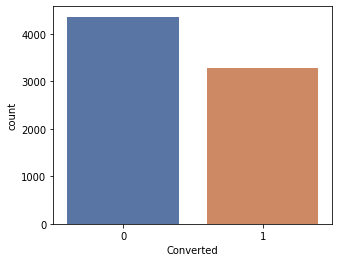

In [ ]:
#Plot a count plot based on the target variable 'converted'
plt.figure(figsize=(5,4))
sns.countplot(x = "Converted", palette='deep', data = lead_df)
plt.xticks(rotation = 0)
plt.show()

0-indicates Not Converted leads,
1-indicates Converted leads

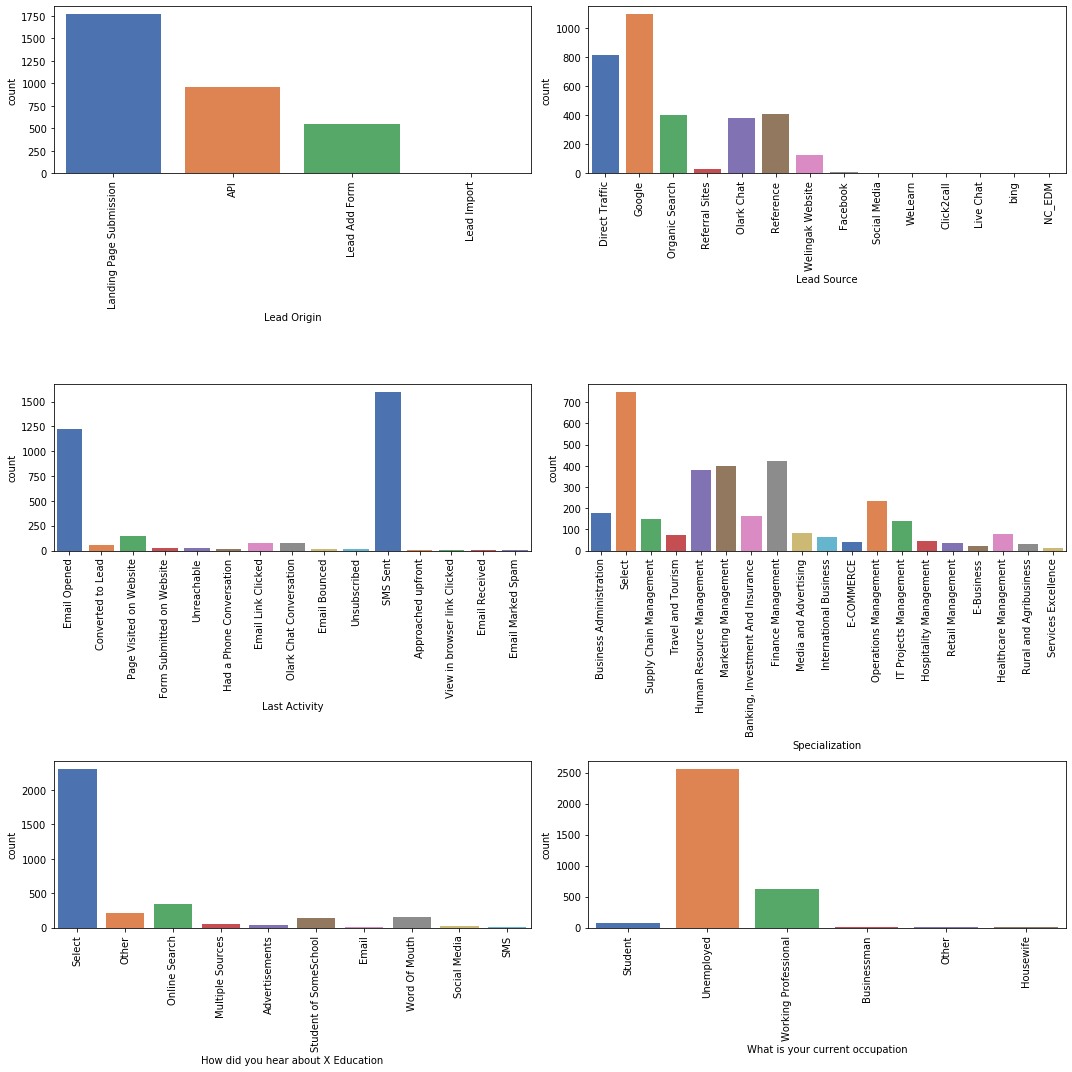

In [ ]:
# Considering Converted leads only
Columns=cat_col_list[0:6]
fig,ax = plt.subplots(3, 2, figsize=(15, 15))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(lead_df[lead_df['Converted']==1][var1], ax=subplot,palette='deep',saturation=1)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

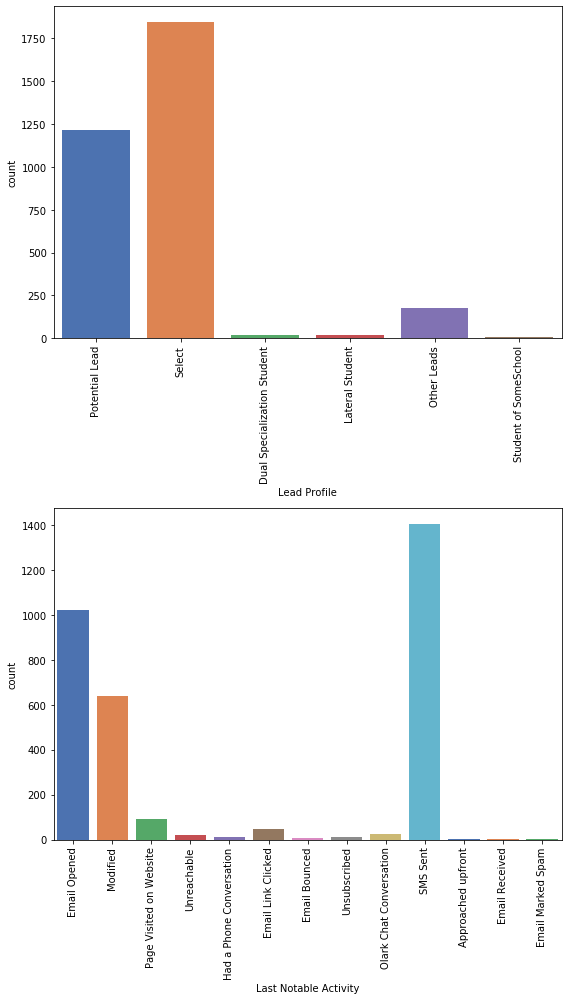

In [ ]:
Columns=cat_col_list[6:10]
fig,ax = plt.subplots(2, 1, figsize=(8, 14))
for var1, subplot in zip(Columns, ax.flatten()):
    sns.countplot(lead_df[lead_df['Converted']==1][var1], ax=subplot,palette='deep',saturation=1)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

**Obeservations:**

 - Majority of the 'Lead Source' is from Google category
 - 'Last Activity' is mostly Email opened or sms sent
 - 'Unemployed folks' leads have been convereted majorly
 - Most of the leads operate through Emails and reply after reading it.
 - 'Last Activity' done on any lead is majorly sending sms.  

In [ ]:
#Merging the elements with least frequency elements in 'Lead_Source' into a group 'Misc'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Press_Release', 'Social Media', 'WeLearn', 'NC_EDM','bing', 'Pay per Click Ads', 'testone', 'welearnblog_Home', 'Click2call', 'youtubechannel', 'blog', 'Live Chat'],'Misc')

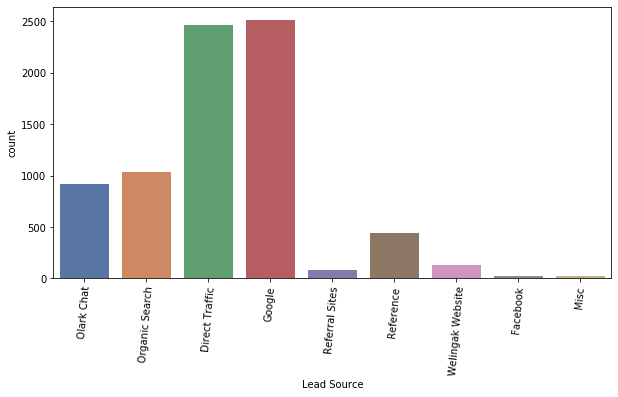

In [ ]:
#Plotting a count plot on 'Lead_Source'
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", palette='deep', data = lead_df)
plt.xticks(rotation = 85)
plt.show()

In [ ]:
#Merging the elements with least frequency elements in 'Last Activity' into a group 'Misc'
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Approached upfront','Email Received','Visited Booth in Tradeshow','Email Marked Spam',
'Resubscribed to emails','Had a Phone Conversation','View in browser link Clicked'],'Misc')

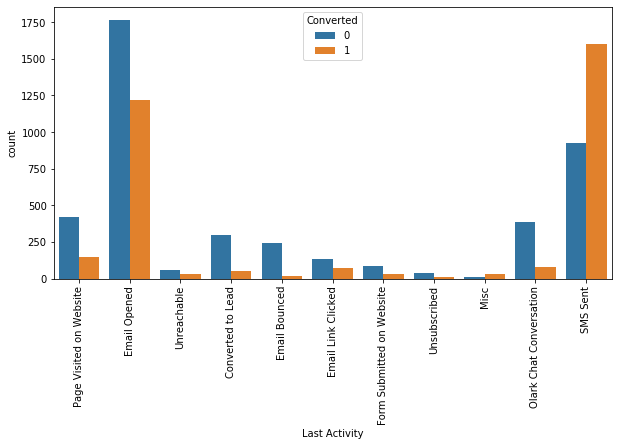

In [ ]:
#Plotting the barplot based on 'Last_Activity' and Target Variable 'Converted'
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

#### Univariate Analysis-Continous Variables

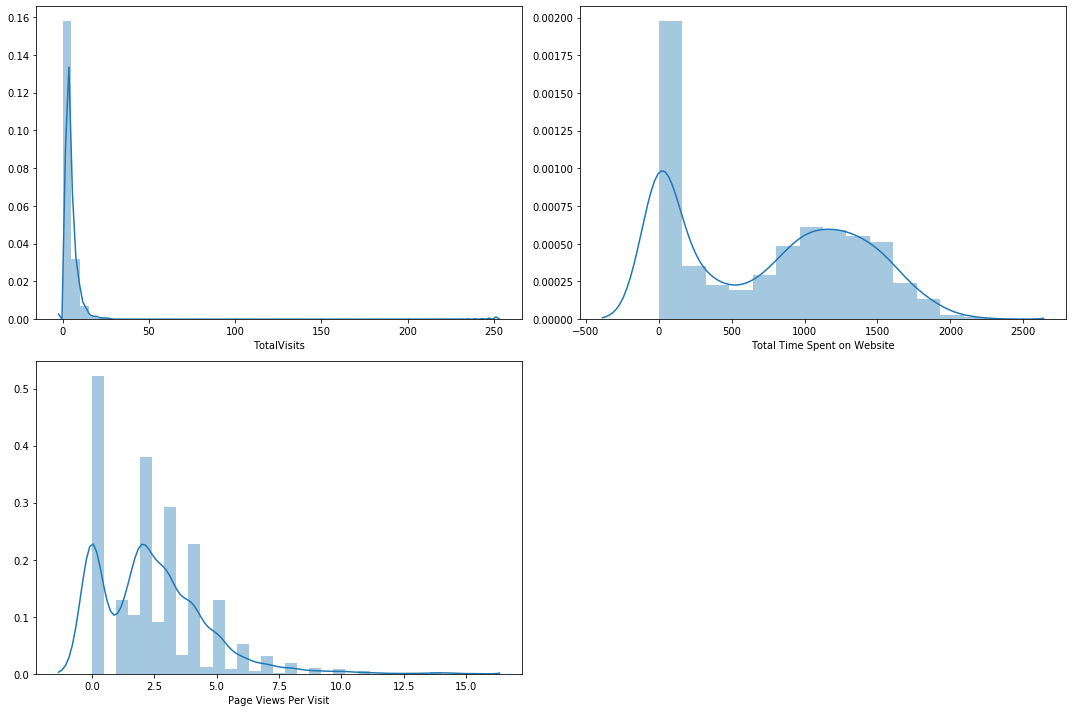

In [ ]:
# Number of numerical columns

num_col_list=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

length=len(num_col_list)

# calculation for subplots
n=2
m=(length//n)+1
count=1

# Setting figure size
plt.figure(1,figsize=(15,10))

# Running in loop to plot all columns as subplot
for col in num_col_list:
    plt.subplot(m,n,count)
    data = abs(lead_df[lead_df['Converted']==1][col])
    sns.distplot(data.dropna(),hist=True)
    count+=1

# Show graphs
plt.tight_layout()
plt.show()    

**Observations:**

 - Total Visits on page are less than 20 for majority of the converted leads.
 - Total Time spent on website for majority falls in particular interval.
 - Page views are in between 1-5 for majority.

#### Bivariate Analysis-Categorical Columns

In [ ]:
# function to plot stacked bar charts

def plot_bar_stacked(*args,data_df):                        
                     
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    
    fig,axes = plt.subplots(m,2, figsize = (12, 6*m))
    ax_li =[item for sublist in axes for item in sublist]
    
    for col in args:
        ax_info = ax_li.pop()
        df1 = data_df.groupby(col)['Converted'].value_counts()
        gf=round(100*df1/sum(df1),2).unstack().sort_values(by=0,ascending=False).plot.bar(stacked=True,ax=ax_info)
        ax_info.set_title(col)
        ax_info.xaxis.set_tick_params(rotation=90)
        ax_info.set(xlabel='')
        ax_info.set(ylabel='Percentage')
        plt.tight_layout()
        

<Figure size 1080x1440 with 0 Axes>

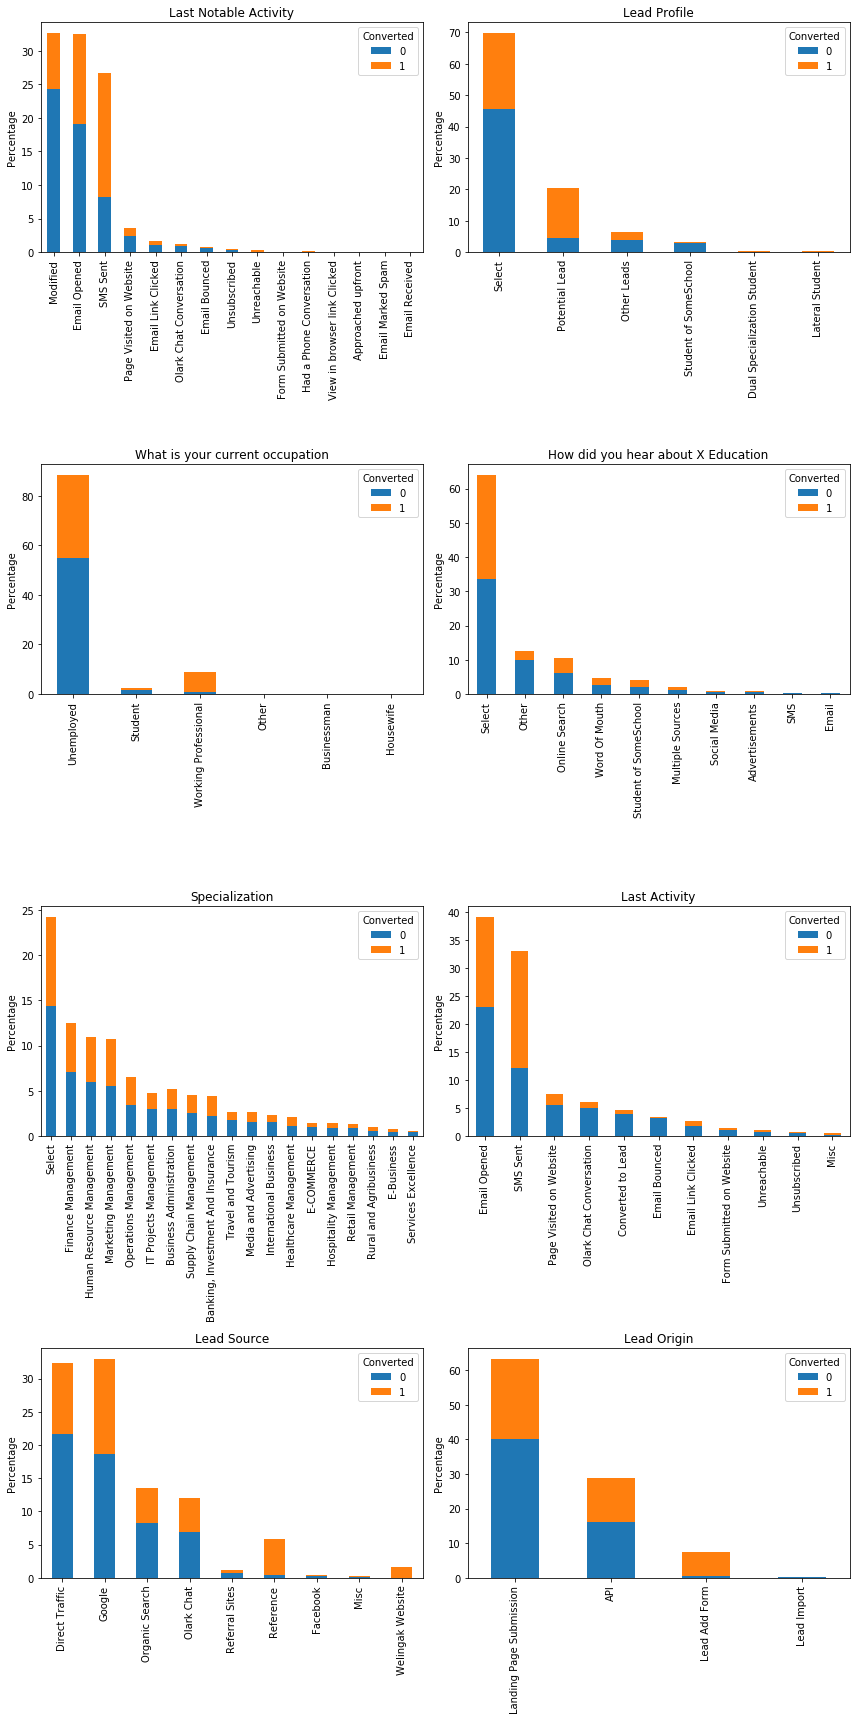

In [ ]:
#Calling above function
plt.figure(figsize=(15,20))
plot_bar_stacked(*cat_col_list[0:],data_df=lead_df)

**Observations:**

 - Almost all the leads have been converted for working professional category
 - Majority the leads have been converted who had Google has lead source
 - 'Specialization' has not been selected by most of the leads
 - 'Email' plays important role in lead conversion

#### Bivariate Analysis-Continous-Continous Variable

(3.0, 0.0)

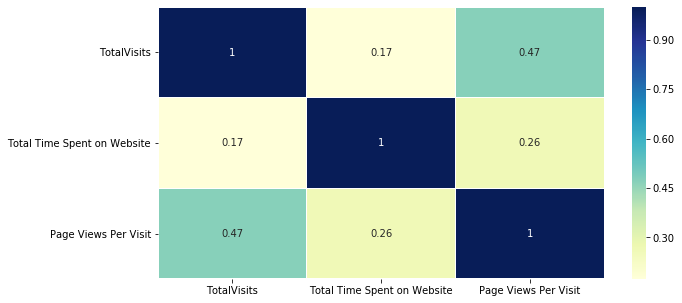

In [ ]:
#Plotting Heatmap to check correlation
lead_corr_chk=lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
plt.figure(figsize = (10, 5))
ax=sns.heatmap(lead_corr_chk.corr(), annot = True,cmap="YlGnBu",linewidths=0.4)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

**Observation:**

 - At this stage less number of numerical columns are present which are not highly correlated.

#### 'Select'/ 'Default' Treatment

In [ ]:
#Checking column Lead Profile
print(lead_df['Lead Profile'].value_counts())

Select                         5326
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


In [ ]:
#Dropping the colmn Lead_Profile as the columns has majority of the values as 'Select' i.e the default value
lead_df.drop(['Lead Profile'],axis=1,inplace=True)

In [ ]:
#Checking column Specialization
print(lead_df['Specialization'].value_counts())

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


As we can see that the  'Select' is the majority of the value of Specialization and its a default option.
We can also see that there are there are 750 Converted(1) and 1100 (Converted :0) if we drop these rows still we will be able to maintain the ratio of the converted 0:1 (1.3) so we can go ahead and drop these rows.

In [ ]:
# Dropping rows with Select as specialization
lead_df = lead_df[lead_df['Specialization'] != 'Select']

In [ ]:
# Checking the values for the column 'How did you hear about X Education'
print(lead_df['How did you hear about X Education'].value_counts()) 

Select                   3076
Other                     950
Online Search             791
Word Of Mouth             344
Student of SomeSchool     304
Multiple Sources          148
Advertisements             67
Social Media               66
Email                      24
SMS                        22
Name: How did you hear about X Education, dtype: int64


In [ ]:
#Merging the elements of 'Select' into a group 'Others'  of 'How_did_you_hear_about_X_Education'
lead_df['How did you hear about X Education'] = lead_df['How did you hear about X Education'].replace(['Select'], 'Misc')

In [ ]:
#Checking Number of columns after removal
print(lead_df.columns)

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')


#### Outlier Treatment

In [ ]:
# Finding percentile for Outlier Identification
lead_num_df = lead_df[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']]
lead_num_df.describe(percentiles=[.01,.10,.25,.5,.75,.90,.95,.96,.97,.98,.99])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,5792.000000,5792.000000,5792.000000
mean,604.620684,4.383115,3.027082
std,555.058578,5.362541,2.104183
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
10%,14.000000,1.000000,1.000000
25%,131.750000,2.000000,2.000000
50%,367.000000,4.000000,3.000000
75%,1086.250000,5.000000,4.000000
90%,1449.000000,8.000000,5.000000


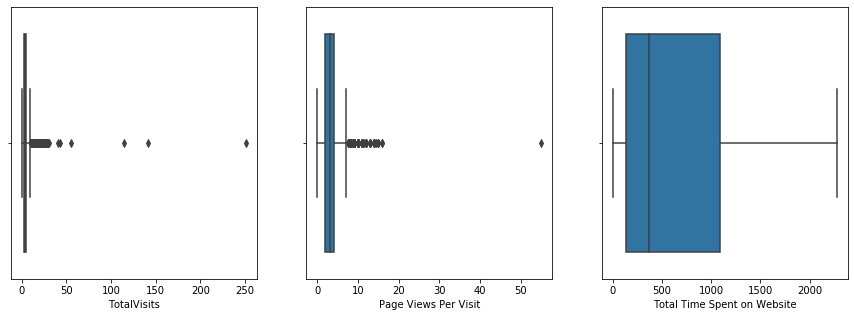

In [ ]:
#Checking outliers in numerical columns
plt.figure(figsize=(15,5))
features = ['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']
for i in enumerate(features):
    ax = plt.subplot(1,3, i[0]+1)
    sns.boxplot(i[1], data = lead_num_df)

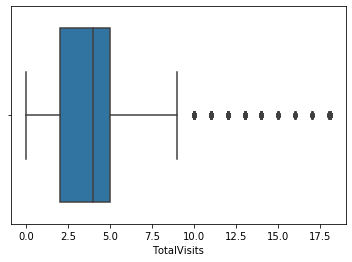

In [ ]:
# #Capping the outliers (greater than the 95 percentile) to the 95 percentile here it is 11
Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df.TotalVisits[lead_df.TotalVisits >= Q3]=Q3
sns.boxplot(x= lead_df["TotalVisits"])

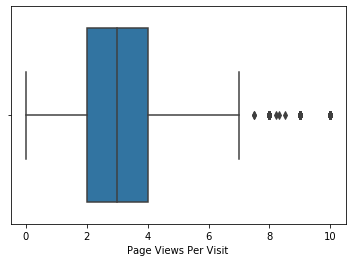

In [ ]:
# #Capping the outliers (greater than the 95 percentile) to the 95 percentile here it is 7
Q1 = lead_df["Page Views Per Visit"].quantile(0.99)
lead_df["Page Views Per Visit"][lead_df["Page Views Per Visit"] >= Q1]=Q1
sns.boxplot(x= lead_df["Page Views Per Visit"])

(4.0, 0.0)

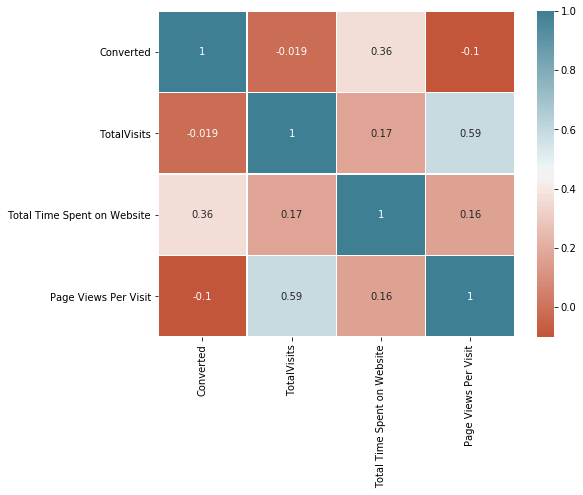

In [ ]:
#Plotting a heat map to check the correlation among the numerical columns
plt.figure(figsize = (8, 6))
ax=sns.heatmap(lead_df.corr(), annot = True,cmap=sns.diverging_palette(20, 220, n=200),linewidths=0.4)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [ ]:
lead_df.shape

(5792, 11)

In [ ]:
# Percentage of the data retained in dataframe

round(lead_df.shape[0]/9240*100,3)

62.684

### Data Preparation

#### Dummy Variable Creation

In [ ]:
#Checking column info
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5792 entries, 2 to 9239
Data columns (total 11 columns):
Lead Origin                           5792 non-null object
Lead Source                           5792 non-null object
Converted                             5792 non-null int64
TotalVisits                           5792 non-null float64
Total Time Spent on Website           5792 non-null int64
Page Views Per Visit                  5792 non-null float64
Last Activity                         5792 non-null object
Specialization                        5792 non-null object
How did you hear about X Education    5792 non-null object
What is your current occupation       5792 non-null object
Last Notable Activity                 5792 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 543.0+ KB


In [ ]:
# Creating the dummy variables for Categorical columns in the dataframe 
lead_dummies_df = pd.get_dummies(lead_df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                                  'How did you hear about X Education','Last Notable Activity']], drop_first=True)

In [ ]:
# Adding the dummy variables and create back to the original dataframe 'lead_df'
lead_df = pd.concat([lead_df, lead_dummies_df], axis=1)
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Misc,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,How did you hear about X Education_Email,How did you hear about X Education_Misc,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Misc,Student,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Online Search,Unemployed,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,Landing Page Submission,Direct Traffic,0,2.0,71,2.0,Email Opened,IT Projects Management,Other,Unemployed,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,API,Google,0,4.0,58,4.0,Email Opened,Finance Management,Word Of Mouth,Unemployed,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dropping the initial columns from the dataframe created after concatenating dummy variables
Lead_Score = lead_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
                                      'How did you hear about X Education','Last Notable Activity'],axis=1)

In [ ]:
Lead_Score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Misc,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,How did you hear about X Education_Email,How did you hear about X Education_Misc,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,2.0,71,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,4.0,58,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
Lead_Score.shape

(5792, 70)

#### Train-Test Split

In [ ]:
# Assigning a feature variable 'X' by dropping the target variable column 'Converted'
X = Lead_Score.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Misc,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,How did you hear about X Education_Email,How did you hear about X Education_Misc,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,2.0,71,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,4.0,58,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Assigning a response variable 'y' 
y = Lead_Score['Converted']

In [ ]:
# Splitting the dataframe into Train and Test datasets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
#Checking shape of train and test data
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (4054, 69)
X_test shape:  (1738, 69)


#### Feature Scaling

In [ ]:
#Create instance of scaler
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [ ]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Misc,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Misc,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,How did you hear about X Education_Email,How did you hear about X Education_Misc,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3188,-1.275475,-1.090099,-1.564681,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8278,-0.072578,-0.398625,0.530273,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8129,0.829595,0.654011,-0.648139,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2393,-0.373302,0.394482,0.006534,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1016,-0.373302,-0.494815,0.006534,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Checking Correlation among Variables

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train, 10))

Top Absolute Correlations
Lead Origin_Lead Import                     Lead Source_Facebook                                    1.000000
Lead Origin_Lead Add Form                   Lead Source_Reference                                   0.966584
What is your current occupation_Unemployed  What is your current occupation_Working Professional    0.890638
Last Activity_Email Opened                  Last Notable Activity_Email Opened                      0.871479
Last Activity_SMS Sent                      Last Notable Activity_SMS Sent                          0.855455
Last Activity_Email Link Clicked            Last Notable Activity_Email Link Clicked                0.831060
Last Activity_Unsubscribed                  Last Notable Activity_Unsubscribed                      0.823804
Last Activity_Page Visited on Website       Last Notable Activity_Page Visited on Website           0.691362
Last Activity_Misc                          Last Notable Activity_Had a Phone Conversation          0.

In [ ]:
#Dropping Highly correlated variables>70%
X_train=X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form',
                      'What is your current occupation_Unemployed',
                      'Last Activity_Email Opened','Last Activity_SMS Sent',
                      'Last Activity_Email Link Clicked',
                      'Last Activity_Unsubscribed'],1)

### Model Building

#### Running First Training Model

In [ ]:
# Applying Logistic Regression on the train dataset
logm=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     3992
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 19 Jul 2020   Deviance:                          nan
Time:                        22:40:07   Pearson chi2:                 5.12e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                    -8.608e+14   1.52e+07  -5.68e+07      0.000   -8.61e+14   -8.61e+14
TotalVisits                                              -4.325e+13   1.29e+06  -3.34e+07      0.000   -4.33e+13   -4.33e+13
Total Time Spent on Website                               4.752e+14   9.33e+05   5.09e+08      0.000    4.75e+14    4.75e+14
Page Views Per Visit                                      -6.34e+13   1.33e+06  -4.76e+07      0.000   -6.34e+13   -6.34e+13
Lead Origin_Landing Page Submission                      -1.516e+14   4.42e+06  -3.43e+07      0.000   -1.52e+14   -1.52e+14
Lead Source_Facebook                                       1.85e+15   2.09e+07   8.85e+07      0.000    1.85e+15    1.85e+15
Lead Source_Google                                        5.151e+14   2.89e+06   1.78e+08      0.000    5.15e+14    5.15e+14
Lead Source_Misc                                          8.298e+14   1.96e+07   4.22e+07      0.000     8.3e+14     8.3e+14
Lead Source_Olark Chat                                    1.051e+15   7.06e+06   1.49e+08      0.000    1.05e+15    1.05e+15
Lead Source_Organic Search                                3.352e+14   3.59e+06   9.35e+07      0.000    3.35e+14    3.35e+14
Lead Source_Reference                                      1.42e+15   6.73e+06   2.11e+08      0.000    1.42e+15    1.42e+15
Lead Source_Referral Sites                                 3.28e+14   1.35e+07   2.43e+07      0.000    3.28e+14    3.28e+14
Lead Source_Welingak Website                              5.301e+15   1.93e+07   2.75e+08      0.000     5.3e+15     5.3e+15
Last Activity_Email Bounced                              -1.006e+15   6.58e+06  -1.53e+08      0.000   -1.01e+15   -1.01e+15
Last Activity_Form Submitted on Website                  -7.058e+14   8.03e+06  -8.79e+07      0.000   -7.06e+14   -7.06e+14
Last Activity_Misc                                       -1.181e+15   2.14e+07  -5.51e+07      0.000   -1.18e+15   -1.18e+15
Last Activity_Olark Chat Conversation                    -4.321e+14   8.31e+06   -5.2e+07      0.000   -4.32e+14   -4.32e+14
Last Activity_Page Visited on Website                    -5.317e+14   5.78e+06   -9.2e+07      0.000   -5.32e+14   -5.32e+14
Last Activity_Unreachable                                -4.158e+14   1.16e+07  -3.57e+07      0.000   -4.16e+14   -4.16e+14
Specialization_Business Administration                   -1.244e+14   4.84e+06  -2.57e+07      0.000   -1.24e+14   -1.24e+14
Specialization_E-Business                                 2.507e+14   1.18e+07   2.12e+07      0.000    2.51e+14    2.51e+14
Specialization_E-COMMERCE                                 9.994e+13    8.6e+06   1.

Here we can see that the p values are all less than 0.05, which is a good indication stating that coefficients are statistically significant

#### Feature selection using RFE

In [ ]:
logreg = LogisticRegression()

In [ ]:
# Running the RFE by considering to have 15 variables in o/p
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Misc', False, 14),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Misc', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_Unreachable', False, 20),
 ('Specialization_Business Administration', False, 48),
 ('Specialization_E-Business', False, 41),
 ('Specialization_E-COMMERCE', False, 27),
 ('Specialization_Finance Management', False, 30),
 ('Specialization_Healthcare Management', False, 

In [ ]:
#Final list of columns after RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website', 'Last Activity_Misc',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'How did you hear about X Education_Email',
       'How did you hear about X Education_SMS',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Analyzing Using Statsmodel

In [ ]:
# First Model after RFE
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm1.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4038
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1781.0
Date:                Sun, 19 Jul 2020   Deviance:                       3562.0
Time:                        22:40:08   Pearson chi2:                 4.61e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0584      0.122      0.480      0.631      -0.180       0.297
Total Time Spent on Website                              1.0770      0.045     23.938      0.000       0.989       1.165
Lead Origin_Landing Page Submission                     -1.2750      0.129     -9.892      0.000      -1.528      -1.022
Lead Source_Reference                                    3.2806      0.356      9.214      0.000       2.583       3.978
Lead Source_Referral Sites                               1.9456      0.557      3.491      0.000       0.853       3.038
Lead Source_Welingak Website                            24.0159   2.01e+04      0.001      0.999   -3.94e+04    3.94e+04
Last Activity_Email Bounced                             -2.1276      0.423     -5.031      0.000      -2.956      -1.299
Last Activity_Form Submitted on Website                 -1.2105      0.355     -3.414      0.001      -1.905      -0.516
Last Activity_Misc                                       0.6908      0.715      0.966      0.334      -0.712       2.093
What is your current occupation_Housewife               24.1434   2.69e+04      0.001      0.999   -5.27e+04    5.27e+04
What is your current occupation_Working Professional     2.9467      0.225     13.109      0.000       2.506       3.387
How did you hear about X Education_Email                 1.4615      0.548      2.669      0.008       0.388       2.535
How did you hear about X Education_SMS                  -1.5764      0.871     -1.810      0.070      -3.283       0.131
Last Notable Activity_Had a Phone Conversation           2.9045      1.298      2.237      0.025       0.360       5.449
Last Notable Activity_SMS Sent                           1.3436      0.094     14.290      0.000       1.159       1.528
Last Notable Activity_Unreachable                        1.2205      0.618      1.976      0.048       0.010       2.431
========================================================================================================================
"""

In [ ]:
# Dropping 'Lead Source_Welingak Website' which has a high p-value>0.05
cols_1=cols.drop('Lead Source_Welingak Website',1)

In [ ]:
#Second model
X_train_sm = sm.add_constant(X_train[cols_1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm2.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4039
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1792.9
Date:                Sun, 19 Jul 2020   Deviance:                       3585.8
Time:                        22:40:08   Pearson chi2:                 4.61e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1587      0.120      1.327      0.184      -0.076       0.393
Total Time Spent on Website                              1.0683      0.045     23.828      0.000       0.980       1.156
Lead Origin_Landing Page Submission                     -1.3697      0.127    -10.752      0.000      -1.619      -1.120
Lead Source_Reference                                    3.1749      0.355      8.938      0.000       2.479       3.871
Lead Source_Referral Sites                               1.9179      0.560      3.424      0.001       0.820       3.016
Last Activity_Email Bounced                             -2.1379      0.423     -5.056      0.000      -2.967      -1.309
Last Activity_Form Submitted on Website                 -1.2444      0.355     -3.507      0.000      -1.940      -0.549
Last Activity_Misc                                       0.6770      0.713      0.949      0.342      -0.721       2.075
What is your current occupation_Housewife               23.1326   1.63e+04      0.001      0.999    -3.2e+04     3.2e+04
What is your current occupation_Working Professional     2.9241      0.225     13.012      0.000       2.484       3.365
How did you hear about X Education_Email                 1.4536      0.547      2.659      0.008       0.382       2.525
How did you hear about X Education_SMS                  -1.5705      0.870     -1.806      0.071      -3.275       0.134
Last Notable Activity_Had a Phone Conversation           2.8990      1.298      2.234      0.025       0.356       5.442
Last Notable Activity_SMS Sent                           1.3359      0.094     14.247      0.000       1.152       1.520
Last Notable Activity_Unreachable                        1.1913      0.618      1.927      0.054      -0.020       2.403
========================================================================================================================
"""

In [ ]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_1].values, i) for i in range(X_train[cols_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Misc,1.78
11,Last Notable Activity_Had a Phone Conversation,1.77
1,Lead Origin_Landing Page Submission,1.42
12,Last Notable Activity_SMS Sent,1.41
2,Lead Source_Reference,1.25
8,What is your current occupation_Working Profes...,1.25
0,Total Time Spent on Website,1.08
4,Last Activity_Email Bounced,1.06
5,Last Activity_Form Submitted on Website,1.02
3,Lead Source_Referral Sites,1.01


In [ ]:
# Dropping 'What is your current occupation_Housewife' which has a high p-value>0.05
cols_2=cols_1.drop('What is your current occupation_Housewife',1)

In [ ]:
#Third model
X_train_sm = sm.add_constant(X_train[cols_2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm3.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4040
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1798.0
Date:                Sun, 19 Jul 2020   Deviance:                       3596.1
Time:                        22:40:09   Pearson chi2:                 4.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1601      0.119      1.340      0.180      -0.074       0.394
Total Time Spent on Website                              1.0660      0.045     23.808      0.000       0.978       1.154
Lead Origin_Landing Page Submission                     -1.3633      0.127    -10.713      0.000      -1.613      -1.114
Lead Source_Reference                                    3.2045      0.355      9.035      0.000       2.509       3.900
Lead Source_Referral Sites                               1.9120      0.560      3.415      0.001       0.815       3.009
Last Activity_Email Bounced                             -2.1435      0.423     -5.071      0.000      -2.972      -1.315
Last Activity_Form Submitted on Website                 -1.2495      0.355     -3.522      0.000      -1.945      -0.554
Last Activity_Misc                                       0.6703      0.713      0.940      0.347      -0.727       2.068
What is your current occupation_Working Professional     2.9190      0.225     12.992      0.000       2.479       3.359
How did you hear about X Education_Email                 1.4457      0.546      2.646      0.008       0.375       2.517
How did you hear about X Education_SMS                  -1.5730      0.869     -1.810      0.070      -3.277       0.131
Last Notable Activity_Had a Phone Conversation           2.8973      1.297      2.233      0.026       0.354       5.440
Last Notable Activity_SMS Sent                           1.3287      0.094     14.188      0.000       1.145       1.512
Last Notable Activity_Unreachable                        1.1841      0.618      1.916      0.055      -0.027       2.395
========================================================================================================================
"""

In [ ]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_2].values, i) for i in range(X_train[cols_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Misc,1.78
10,Last Notable Activity_Had a Phone Conversation,1.77
1,Lead Origin_Landing Page Submission,1.42
11,Last Notable Activity_SMS Sent,1.41
7,What is your current occupation_Working Profes...,1.25
2,Lead Source_Reference,1.24
0,Total Time Spent on Website,1.08
4,Last Activity_Email Bounced,1.06
5,Last Activity_Form Submitted on Website,1.02
3,Lead Source_Referral Sites,1.01


In [ ]:
# Dropping Column 'Last Activity_Misc' as it has high p value>0.05
cols_3=cols_2.drop('Last Activity_Misc',1)

In [ ]:
#Fourth model
X_train_sm = sm.add_constant(X_train[cols_3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm4.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4041
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1798.5
Date:                Sun, 19 Jul 2020   Deviance:                       3597.0
Time:                        22:40:09   Pearson chi2:                 4.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1629      0.119      1.364      0.173      -0.071       0.397
Total Time Spent on Website                              1.0664      0.045     23.817      0.000       0.979       1.154
Lead Origin_Landing Page Submission                     -1.3630      0.127    -10.707      0.000      -1.612      -1.113
Lead Source_Reference                                    3.2075      0.355      9.044      0.000       2.512       3.903
Lead Source_Referral Sites                               1.9097      0.560      3.411      0.001       0.812       3.007
Last Activity_Email Bounced                             -2.1471      0.423     -5.079      0.000      -2.976      -1.319
Last Activity_Form Submitted on Website                 -1.2531      0.355     -3.531      0.000      -1.949      -0.558
What is your current occupation_Working Professional     2.9232      0.225     13.018      0.000       2.483       3.363
How did you hear about X Education_Email                 1.4428      0.546      2.640      0.008       0.372       2.514
How did you hear about X Education_SMS                  -1.5753      0.869     -1.812      0.070      -3.279       0.128
Last Notable Activity_Had a Phone Conversation           3.5647      1.086      3.282      0.001       1.436       5.694
Last Notable Activity_SMS Sent                           1.3255      0.094     14.163      0.000       1.142       1.509
Last Notable Activity_Unreachable                        1.1811      0.618      1.911      0.056      -0.030       2.392
========================================================================================================================
"""

In [ ]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_3].values, i) for i in range(X_train[cols_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,1.42
10,Last Notable Activity_SMS Sent,1.41
2,Lead Source_Reference,1.24
6,What is your current occupation_Working Profes...,1.24
0,Total Time Spent on Website,1.08
4,Last Activity_Email Bounced,1.06
5,Last Activity_Form Submitted on Website,1.02
3,Lead Source_Referral Sites,1.01
7,How did you hear about X Education_Email,1.01
8,How did you hear about X Education_SMS,1.01


In [ ]:
# Dropping Column 'How did you hear about X Education_SMS' as it has high p value>0.05
cols_4=cols_3.drop('How did you hear about X Education_SMS',1)

In [ ]:
#Fifth model
X_train_sm = sm.add_constant(X_train[cols_4])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm5.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4042
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1800.5
Date:                Sun, 19 Jul 2020   Deviance:                       3601.1
Time:                        22:40:10   Pearson chi2:                 4.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1643      0.119      1.375      0.169      -0.070       0.398
Total Time Spent on Website                              1.0660      0.045     23.828      0.000       0.978       1.154
Lead Origin_Landing Page Submission                     -1.3690      0.127    -10.759      0.000      -1.618      -1.120
Lead Source_Reference                                    3.2071      0.355      9.042      0.000       2.512       3.902
Lead Source_Referral Sites                               1.9146      0.560      3.417      0.001       0.816       3.013
Last Activity_Email Bounced                             -2.1440      0.423     -5.074      0.000      -2.972      -1.316
Last Activity_Form Submitted on Website                 -1.2695      0.353     -3.592      0.000      -1.962      -0.577
What is your current occupation_Working Professional     2.9149      0.224     13.003      0.000       2.476       3.354
How did you hear about X Education_Email                 1.4478      0.546      2.650      0.008       0.377       2.519
Last Notable Activity_Had a Phone Conversation           3.5686      1.086      3.285      0.001       1.440       5.698
Last Notable Activity_SMS Sent                           1.3232      0.094     14.151      0.000       1.140       1.506
Last Notable Activity_Unreachable                        1.1841      0.618      1.916      0.055      -0.027       2.396
========================================================================================================================
"""

In [ ]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols_4].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_4].values, i) for i in range(X_train[cols_4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,1.41
9,Last Notable Activity_SMS Sent,1.41
2,Lead Source_Reference,1.24
6,What is your current occupation_Working Profes...,1.24
0,Total Time Spent on Website,1.08
4,Last Activity_Email Bounced,1.06
5,Last Activity_Form Submitted on Website,1.02
3,Lead Source_Referral Sites,1.01
7,How did you hear about X Education_Email,1.01
10,Last Notable Activity_Unreachable,1.01


In [ ]:
# Dropping Column 'Last Notable Activity_Unreachable' as it has high p value>0.05
cols_5=cols_4.drop('Last Notable Activity_Unreachable',1)

In [ ]:
#Sixth model
X_train_sm = sm.add_constant(X_train[cols_5])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
outcome = logm6.fit()
outcome.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4054
Model:                            GLM   Df Residuals:                     4043
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1802.4
Date:                Sun, 19 Jul 2020   Deviance:                       3604.8
Time:                        22:40:10   Pearson chi2:                 4.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1767      0.119      1.482      0.138      -0.057       0.410
Total Time Spent on Website                              1.0649      0.045     23.827      0.000       0.977       1.152
Lead Origin_Landing Page Submission                     -1.3746      0.127    -10.809      0.000      -1.624      -1.125
Lead Source_Reference                                    3.2094      0.355      9.052      0.000       2.515       3.904
Lead Source_Referral Sites                               1.9420      0.555      3.497      0.000       0.854       3.030
Last Activity_Email Bounced                             -2.1513      0.422     -5.092      0.000      -2.979      -1.323
Last Activity_Form Submitted on Website                 -1.2795      0.353     -3.620      0.000      -1.972      -0.587
What is your current occupation_Working Professional     2.9127      0.224     12.997      0.000       2.473       3.352
How did you hear about X Education_Email                 1.4411      0.546      2.639      0.008       0.371       2.511
Last Notable Activity_Had a Phone Conversation           3.5606      1.086      3.278      0.001       1.432       5.689
Last Notable Activity_SMS Sent                           1.3158      0.093     14.091      0.000       1.133       1.499
========================================================================================================================
"""

In [ ]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[cols_5].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_5].values, i) for i in range(X_train[cols_5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,1.41
9,Last Notable Activity_SMS Sent,1.41
2,Lead Source_Reference,1.24
6,What is your current occupation_Working Profes...,1.24
0,Total Time Spent on Website,1.08
4,Last Activity_Email Bounced,1.06
5,Last Activity_Form Submitted on Website,1.02
3,Lead Source_Referral Sites,1.01
7,How did you hear about X Education_Email,1.01
8,Last Notable Activity_Had a Phone Conversation,1.00


P values of the sixth model seem to be significant with value lower than 0.
05 and VIF also has value less than 5 for all variables indicating least multicollinearity.

In [ ]:
# Getting predicted values on train dataset
y_train_predict = outcome.predict(X_train_sm)
print(y_train_predict[:10])

3188    0.971836
8278    0.164885
8129    0.693044
2393    0.644926
1016    0.151261
1724    0.127868
48      0.799533
8842    0.014624
7812    0.277378
3008    0.500267
dtype: float64


In [ ]:
y_train_predict = y_train_predict.values.reshape(-1)
y_train_predict[:10]

array([0.97183585, 0.16488507, 0.69304392, 0.64492564, 0.15126051,
       0.12786806, 0.79953294, 0.0146241 , 0.27737807, 0.50026677])

In [ ]:
# Creating a dataframe with the actual conversion flag and the predicted probabilities
y_train_predict_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_predict})
y_train_predict_final['Lead_ID'] = y_train.index
y_train_predict_final.head()

,Converted,Converted_prob,Lead_ID
0,0,0.971836,3188
1,0,0.164885,8278
2,0,0.693044,8129
3,1,0.644926,2393
4,0,0.151261,1016


#### Plotting ROC Curve

In [ ]:
def plot_ROC(actual, proba):
    fpr, tpr, thresholds = metrics.roc_curve( actual, proba,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, proba)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC_curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR (or) [1 - Specificity]')
    plt.ylabel('Sensitivity')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_predict_final.Converted, y_train_predict_final.Converted_prob, drop_intermediate = False )

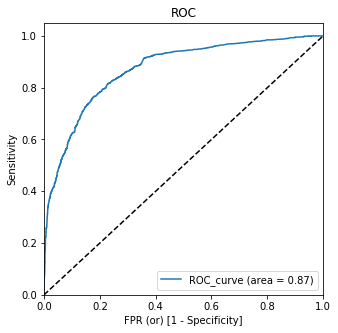

In [ ]:
plot_ROC(y_train_predict_final.Converted, y_train_predict_final.Converted_prob)

Since the ROC curve is very close to the left- hand border and the top - border, we can say that this model is good, with area under curve as 0.87

#### Finding optimal cut-off point

In [ ]:
# creating columns with different probabilities 
numbers=[0.0,0.10,0.20,0.30,0.35,0.38,0.39,0.40,0.41,0.42,0.43,0.50,0.60,0.70,0.80,0.90]
for n in numbers:
  y_train_predict_final[n]=y_train_predict_final.Converted_prob.map(lambda x:1 if x>n else 0)
y_train_predict_final.head()

,Converted,Converted_prob,Lead_ID,0.0,0.1,0.2,0.3,0.35,0.38,0.39,0.4,0.41,0.42,0.43,0.5,0.6,0.7,0.8,0.9
0,0,0.971836,3188,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.164885,8278,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.693044,8129,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
3,1,0.644926,2393,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
4,0,0.151261,1016,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculating Sensitivity, Specificity and Accuracy at various Probability cutoffs

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cutoff_prob_df=pd.DataFrame(columns=['Probability','Sensitivity','Specificity','Accuracy'])
num=[0.0,0.10,0.20,0.30,0.35,0.38,0.39,0.40,0.41,0.42,0.43,0.50,0.60,0.70,0.80,0.90]
for i in num:
  cfm=metrics.confusion_matrix(y_train_predict_final.Converted,y_train_predict_final[i])
  total=sum(sum(cfm))
  Sensitivity=round(cfm[1,1]/(cfm[1,1]+cfm[1,0]),2)
  Specificity=round(cfm[0,0]/(cfm[0,0]+cfm[0,1]),2)
  Accuracy=round((cfm[0,0]+cfm[1,1])/total,2)
  cutoff_prob_df.loc[i]=[i,Sensitivity,Specificity,Accuracy]
print(cutoff_prob_df)

      Probability  Sensitivity  Specificity  Accuracy
0.00         0.00         1.00         0.00      0.44
0.10         0.10         0.98         0.20      0.55
0.20         0.20         0.93         0.59      0.74
0.30         0.30         0.87         0.68      0.77
0.35         0.35         0.83         0.74      0.78
0.38         0.38         0.81         0.78      0.79
0.39         0.39         0.80         0.78      0.79
0.40         0.40         0.79         0.79      0.79
0.41         0.41         0.78         0.80      0.79
0.42         0.42         0.77         0.81      0.79
0.43         0.43         0.77         0.82      0.80
0.50         0.50         0.71         0.86      0.79
0.60         0.60         0.62         0.90      0.78
0.70         0.70         0.53         0.93      0.76
0.80         0.80         0.43         0.96      0.73
0.90         0.90         0.31         0.99      0.69


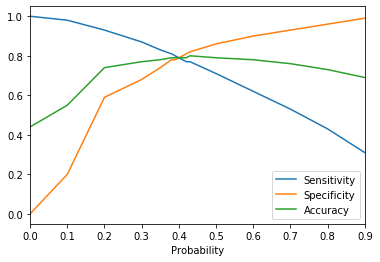

In [ ]:
# Plotting Sensitivity and Specificity 
cutoff_prob_df.plot.line(x='Probability', y=['Sensitivity','Specificity','Accuracy'])
plt.show()

Optimal Cut off point is found to be 0.38 from above analysis

#### Confusion Matrix

In [ ]:
#Creating a new column 'predicted' to have '1' if Converted_prob > 0.38 or else have '0'
y_train_predict_final['predicted'] = y_train_predict_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [ ]:
y_train_predict_final.head()

,Converted,Converted_prob,Lead_ID,0.0,0.1,0.2,0.3,0.35,0.38,0.39,0.4,0.41,0.42,0.43,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.971836,3188,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.164885,8278,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.693044,8129,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.644926,2393,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.151261,1016,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Deriving Confusion matrix for the train dataset
confusion_m = metrics.confusion_matrix(y_train_predict_final.Converted, y_train_predict_final.predicted )
print(confusion_m)

[[1757  509]
 [ 343 1445]]


In [ ]:
# Overall Accuracy of train model in percentage
print("Accuracy:", round(metrics.accuracy_score(y_train_predict_final.Converted, y_train_predict_final.predicted)*100,2))

Accuracy: 78.98


In [ ]:
# Assigning each element in Confusion_Matrix to variables
TN = confusion_m[0,0] # True Negatives
FP = confusion_m[0,1] # False Positives
FN = confusion_m[1,0] # False Negatives
TP = confusion_m[1,1] # True Positives

In [ ]:
# Checking Sensitivity/Recall of the obtained logistic Regression model
print("Sensitivity:",round(TP / float(TP+FN)*100,2))

Sensitivity: 80.82


In [ ]:
# Finding Positive Predictive Value (PPV)/Precision of the obtained logistic Regression model
print("Precision:",round(TP / float(TP+FP)*100,2))

Precision: 73.95


In [ ]:
# Checking Specificity of the obtained logistic Regression model
print("Specificity:",round(TN / float(TN+FP)*100,2))

Specificity: 77.54


In [ ]:
# Finding Negative Predictive Value (NPV) of the obtained logistic Regression model
print("NPV:", round(TN / float(TN+ FN)*100,2))

NPV: 83.67


In [ ]:
# False Positive Rate Value (FPR) of the obtained logistic Regression model
print(round(FP / float(TN+ FP),2))

0.22


#### Precision and Recall

In [ ]:
# Finding Precision Score for final train dataframe
print("Precision_Score:", round(precision_score(y_train_predict_final.Converted , y_train_predict_final.predicted)*100,2))

Precision_Score: 73.95


In [ ]:
# Finding Recall Score for final train dataframe
print("Recall_Score:", round(recall_score(y_train_predict_final.Converted, y_train_predict_final.predicted)*100,2))

Recall_Score: 80.82


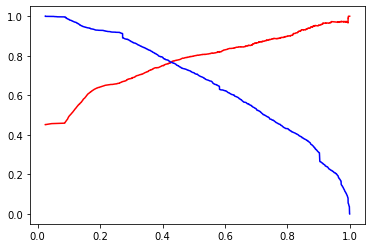

In [ ]:
# Precision and Recall Tradeoff

#Plotting the Precision_Recall Curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_predict_final.Converted, y_train_predict_final.Converted_prob)
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

### Making predictions on the Test set

In [ ]:
#scaling columns
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [ ]:
X_test = X_test[cols_5]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Reference,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,What is your current occupation_Working Professional,How did you hear about X Education_Email,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
7614,-0.001599,1,0,0,0,0,0,0,0,1
7388,-0.747852,1,0,0,0,0,0,0,0,1
7657,-0.962334,1,0,0,0,0,0,0,0,0
965,-0.400428,1,0,0,0,0,0,0,0,0
6875,0.921911,1,0,0,0,0,0,0,0,0


In [ ]:
#adding constant
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = outcome.predict(X_test_sm)
print(y_test_pred[:10])

7614    0.529031
7388    0.336619
7657    0.097740
965     0.164621
6875    0.446176
3184    0.162042
8969    0.195490
8061    0.472891
2949    0.124880
8980    0.997358
dtype: float64


In [ ]:
#Converting 'y_test_pred' which is an array to a dataframe 'y_pred_df'
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
7614,0.529031
7388,0.336619
7657,0.097740
965,0.164621
6875,0.446176


In [ ]:
print(y_test[:10])

7614    0
7388    0
7657    0
965     0
6875    0
3184    0
8969    0
8061    1
2949    0
8980    1
Name: Converted, dtype: int64


In [ ]:
#Converting 'y_test' which is an array to a dataframe 'y_test_df1'
y_test_df1 = pd.DataFrame(y_test)

In [ ]:
# Adding 'Lead_ID' to index
# Dropping index for both dataframes 'y_test_df1' and 'y_pred_df'
y_test_df1['Lead_ID'] = y_test_df1.index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df1.reset_index(drop=True, inplace=True)

In [ ]:
# Concatenate both the datframes 'y_test_df1' and 'y_pred'
y_predict_model_final = pd.concat([y_test_df1, y_pred_df],axis=1)
y_predict_model_final.head()

,Converted,Lead_ID,0
0,0,7614,0.529031
1,0,7388,0.336619
2,0,7657,0.097740
3,0,965,0.164621
4,0,6875,0.446176


In [ ]:
# Renaming the column to 'Converted_Prob' indicating the probability
y_predict_model_final = y_predict_model_final.rename(columns={ 0 : 'Converted_prob'})

# Rearranging the columns to have a better understanding
y_predict_model_final = y_predict_model_final.reindex(['Lead_ID','Converted_prob','Converted'], axis='columns')

y_predict_model_final.head()

,Lead_ID,Converted_prob,Converted
0,7614,0.529031,0
1,7388,0.336619,0
2,7657,0.097740,0
3,965,0.164621,0
4,6875,0.446176,0


In [ ]:
# Assigning the column 'Predicted_Result' based on predicted probability
y_predict_model_final['Predicted_Result'] = y_predict_model_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)
y_predict_model_final.head()

,Lead_ID,Converted_prob,Converted,Predicted_Result
0,7614,0.529031,0,1
1,7388,0.336619,0,0
2,7657,0.097740,0,0
3,965,0.164621,0,0
4,6875,0.446176,0,1


#### Lead Score Generation

In [ ]:
# Obtaining Final model by assigning 'Lead_Score'
y_predict_model_final['Lead_Score'] = y_predict_model_final.Converted_prob.map( lambda x: round(x*100))
y_predict_model_final.head()

,Lead_ID,Converted_prob,Converted,Predicted_Result,Lead_Score
0,7614,0.529031,0,1,53
1,7388,0.336619,0,0,34
2,7657,0.097740,0,0,10
3,965,0.164621,0,0,16
4,6875,0.446176,0,1,45


In [ ]:
# Checking the accuracy attained in the model
print("Accuracy:",round(metrics.accuracy_score(y_predict_model_final.Converted, y_predict_model_final.Predicted_Result)*100,2))

Accuracy: 78.02


In [ ]:
#Creating Confusion Matrix
Confusion_Matrix = metrics.confusion_matrix(y_predict_model_final.Converted, y_predict_model_final.Predicted_Result)
print(Confusion_Matrix)

[[774 218]
 [164 582]]


In [ ]:
# Assigning each element in Confusion_Matrix to variables
TP = Confusion_Matrix[1,1] # True Positives
FP = Confusion_Matrix[0,1] # False Positives
TN = Confusion_Matrix[0,0] # True Negatives
FN = Confusion_Matrix[1,0] # False Negatives

In [ ]:
# Finding Sensitivity/Recall of the obtained logistic Regression model
print("Sensitivity:",round(TP / float(TP+FN)*100,2))

Sensitivity: 78.02


In [ ]:
# Finding Specificity of the obtained logistic Regression model
print("Specificity:",round(TN / float(TN+FP)*100,2))

Specificity: 78.02


In [ ]:
# Finding Positive Predictive Value (PPV)/Precision of the obtained logistic Regression model
print("Precision:",round(TP / float(TP+FP)*100,2))

Precision: 72.75
